In [1]:
%load_ext autoreload
%autoreload 2
from cnn_mnist_norm import CnnMnist

In [2]:
model_a = CnnMnist(model_id=0)
model_b = CnnMnist(model_id=1)


In [3]:
model_a.train(lr=5e-2, epoches=6)
model_b.train(lr=5e-2, epoches=6)

Using device cuda
Epoch 1:	Train loss: 2.206614	Test loss: 2.215308	Test accuracy: 0.219000
Epoch 2:	Train loss: 2.097016	Test loss: 2.035182	Test accuracy: 0.311800
Epoch 3:	Train loss: 2.018870	Test loss: 1.914960	Test accuracy: 0.347100
Epoch 4:	Train loss: 1.961611	Test loss: 1.859217	Test accuracy: 0.337600
Epoch 5:	Train loss: 1.912805	Test loss: 1.833738	Test accuracy: 0.378600
Epoch 6:	Train loss: 1.839764	Test loss: 1.822220	Test accuracy: 0.372300
Using device cuda
Epoch 1:	Train loss: 2.232207	Test loss: 2.237354	Test accuracy: 0.285000
Epoch 2:	Train loss: 2.135169	Test loss: 2.071579	Test accuracy: 0.314600
Epoch 3:	Train loss: 2.023380	Test loss: 1.946852	Test accuracy: 0.312200
Epoch 4:	Train loss: 1.914283	Test loss: 1.878633	Test accuracy: 0.348500
Epoch 5:	Train loss: 1.862774	Test loss: 1.862792	Test accuracy: 0.372600
Epoch 6:	Train loss: 1.878059	Test loss: 1.847514	Test accuracy: 0.367800


In [12]:
list(model_a.state_dict.keys())

['0.weight',
 '0.bias',
 '1.weight',
 '1.bias',
 '4.weight',
 '4.bias',
 '5.weight',
 '5.bias',
 '9.weight',
 '9.bias']

In [13]:
permutation = model_a.match_weights(model_b, seed=1)
permutation

4.weight (96, 30, 3, 3) (96,)
0/P0: 7.3824342593725305
4.weight (96, 30, 3, 3) (30,)
0/P1: 24.527574982661918
4.weight (96, 30, 3, 3) (96,)
1/P0: 0.06241838075220585
4.weight (96, 30, 3, 3) (30,)
1/P1: 0.1996470275335014
4.weight (96, 30, 3, 3) (30,)
2/P1: 0.0
4.weight (96, 30, 3, 3) (96,)
2/P0: 0.0


{'P0': array([ 2, 27, 14,  5, 11, 28,  7, 19, 12, 18, 10,  1, 24,  4, 17, 16, 25,
        26, 21,  8,  3, 15,  9,  6, 29, 22,  0, 20, 13, 23]),
 'P1': array([60, 68, 51, 26, 91, 65, 76, 66, 34,  0, 52, 74, 42, 77, 71, 32, 23,
         6, 79, 41, 89,  9, 87, 24, 64, 84, 22, 10, 54, 72, 48, 20, 90, 46,
        47, 35, 31,  4, 58, 92, 45, 25,  3, 82, 43, 12, 39, 93, 37, 29,  8,
        55, 40, 56, 11, 53, 86, 57, 50, 19, 33, 44, 13,  7, 88, 18, 36, 28,
        62,  5, 67, 83, 14, 27, 63, 21, 75, 80,  2, 94, 15,  1, 73, 16, 17,
        30, 85, 59, 81, 61, 78, 70, 69, 38, 95, 49])}

In [14]:
model_b_permuted = model_b.get_permuted_model(permutation)

0.weight (30, 1, 3, 3) (30,)
1.weight (30,) (30,)
1.bias (30,) (30,)
4.weight (96, 30, 3, 3) (96,)
4.weight (96, 30, 3, 3) (30,)
5.weight (96,) (96,)
5.bias (96,) (96,)
9.weight (10, 96) (96,)


In [15]:
model_b.validate()

(Accuracy, Loss=-1)


(0.3678, -1)

In [16]:
model_b_permuted.validate()

(Accuracy, Loss=-1)


(0.3678, -1)

In [17]:
blend_model = model_a.get_blend_model(model_b_permuted, 0.5)
blend_model.validate()

(Accuracy, Loss=-1)


(0.3352, -1)

In [18]:
blend_model = model_a.get_blend_model(model_b, 0.5)
blend_model.validate()

(Accuracy, Loss=-1)


(0.1142, -1)

(Accuracy, Loss=-1)
(Accuracy, Loss=-1)
(Accuracy, Loss=-1)
(Accuracy, Loss=-1)
(Accuracy, Loss=-1)
(Accuracy, Loss=-1)
(Accuracy, Loss=-1)
(Accuracy, Loss=-1)
(Accuracy, Loss=-1)
(Accuracy, Loss=-1)
(Accuracy, Loss=-1)
(Accuracy, Loss=-1)
(Accuracy, Loss=-1)
(Accuracy, Loss=-1)
(Accuracy, Loss=-1)
(Accuracy, Loss=-1)
(Accuracy, Loss=-1)
(Accuracy, Loss=-1)
(Accuracy, Loss=-1)
(Accuracy, Loss=-1)
(Accuracy, Loss=-1)
(Accuracy, Loss=-1)
(Accuracy, Loss=-1)
(Accuracy, Loss=-1)
(Accuracy, Loss=-1)
(Accuracy, Loss=-1)
(Accuracy, Loss=-1)
(Accuracy, Loss=-1)
(Accuracy, Loss=-1)
(Accuracy, Loss=-1)
(Accuracy, Loss=-1)
(Accuracy, Loss=-1)
(Accuracy, Loss=-1)
(Accuracy, Loss=-1)
(Accuracy, Loss=-1)
(Accuracy, Loss=-1)
(Accuracy, Loss=-1)
(Accuracy, Loss=-1)
(Accuracy, Loss=-1)
(Accuracy, Loss=-1)


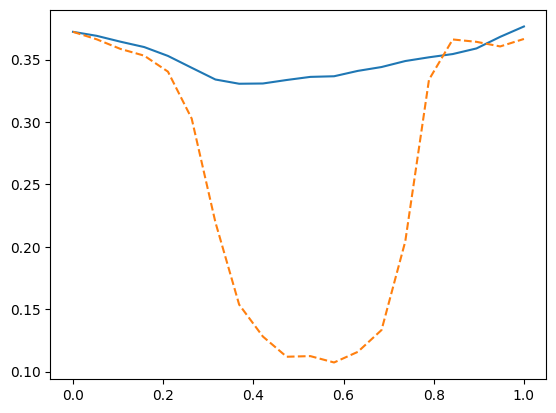

In [19]:
import numpy as np
import matplotlib.pyplot as plt

lambdas, accs, accs_tupo = [], [], []
for _lambda in np.linspace(0, 1, 20):
    blend_model = model_a.get_blend_model(model_b_permuted, _lambda)
    blend_model_tupo = model_a.get_blend_model(model_b, _lambda)
    
    
    acc, _ = blend_model.validate()
    accs.append(acc)
    
    acc_tupo, _ = blend_model_tupo.validate()
    accs_tupo.append(acc_tupo)
                                               
    lambdas.append(_lambda)

plt.plot(lambdas, accs)
plt.plot(lambdas, accs_tupo, '--')